# Data analyse

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

In [2]:
df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e32f7675-913b-4e01-b8c8-0a29733e4407", delimiter=';')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       799 non-null    object 
 1   nom                      799 non-null    object 
 2   insee                    799 non-null    int64  
 3   adresse                  788 non-null    object 
 4   url                      627 non-null    object 
 5   type_usagers             799 non-null    object 
 6   gratuit                  799 non-null    int64  
 7   nb_places                799 non-null    int64  
 8   nb_pr                    501 non-null    float64
 9   nb_pmr                   599 non-null    float64
 10  nb_voitures_electriques  534 non-null    float64
 11  nb_velo                  521 non-null    float64
 12  nb_2r_el                 411 non-null    float64
 13  nb_autopartage           459 non-null    float64
 14  nb_2_rm                  4

In [3]:
df.describe(include='all')

,id,nom,insee,adresse,url,type_usagers,gratuit,nb_places,nb_pr,nb_pmr,...,tarif_1h,tarif_2h,tarif_3h,tarif_4h,tarif_24h,abo_resident,abo_non_resident,type_ouvrage,info,id_source
count,799,799,799.000000,788,627,799,799.000000,799.000000,501.000000,599.000000,...,429.000000,398.000000,427.000000,424.000000,389.000000,398.000000,474.000000,621,388,282
unique,799,794,NaN,741,321,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,181,282
top,04070-P-001,Parking Hôtel de Ville,NaN,Avenue Kennedy - 33700 MERIGNAC,https://www.lpa-and-co.fr/,tous,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ouvrage,Accessible libre 24h/24 et 7j/7,CUBPK49
freq,1,3,NaN,5,121,625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387,40,1
mean,NaN,NaN,57738.742178,NaN,NaN,NaN,0.135169,327.627034,64.826347,6.661102,...,2.311981,4.501005,6.127986,7.932783,20.656170,74.479663,116.632270,NaN,NaN,NaN
std,NaN,NaN,20631.221452,NaN,NaN,NaN,0.342118,407.600972,153.296366,7.264957,...,2.569028,3.607570,5.197923,6.864923,24.071484,64.756431,112.933618,NaN,NaN,NaN
min,NaN,NaN,4070.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,38405.000000,NaN,NaN,NaN,0.000000,58.000000,0.000000,2.000000,...,0.600000,2.000000,1.800000,2.400000,8.000000,28.300000,50.000000,NaN,NaN,NaN
50%,NaN,NaN,67482.000000,NaN,NaN,NaN,0.000000,205.000000,0.000000,5.000000,...,2.000000,4.200000,5.800000,7.250000,18.000000,60.000000,82.000000,NaN,NaN,NaN
75%,NaN,NaN,75101.000000,NaN,NaN,NaN,0.000000,456.000000,80.000000,10.000000,...,3.600000,6.400000,8.050000,10.500000,29.700000,96.637500,170.000000,NaN,NaN,NaN


In [4]:
df.head(10)

,id,nom,insee,adresse,url,type_usagers,gratuit,nb_places,nb_pr,nb_pmr,...,tarif_1h,tarif_2h,tarif_3h,tarif_4h,tarif_24h,abo_resident,abo_non_resident,type_ouvrage,info,id_source
0,04070-P-001,Parking Gassendi,4070,Place Général de Gaulle,NaN,tous,0,222,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ouvrage,En travaux en 2020,NaN
1,06027-P-001,PLANASTEL,6027,12 rue du château. 06800. Cagnes-sur-Mer,http://niceazurparking.fr/,tous,0,158,0.0,0.0,...,2.0,3.6,5.2,6.8,27.2,70.7,116.9,ouvrage,NaN,NaN
2,06027-P-002,MATTEI,6027,Passage de la Grève. 06800. Cagnes-sur-Mer,NaN,tous,0,62,0.0,3.0,...,1.6,2.9,4.1,5.5,15.2,NaN,NaN,enclos_en_surface,Pas d'abonnement mensuel. uniquement annuel (r...,NaN
3,06027-P-003,RENOIR,6027,38 avenue Auguste Renoir. 06800. Cagnes-sur-Mer,NaN,abonnés,0,47,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,enclos_en_surface,Pas d'abonnement mensuel. uniquement annuel (r...,NaN
4,06088-P-001,CORVESY,6088,3 rue Alexandre Mari. 06000. Nice,http://niceazurparking.fr/,tous,0,329,0.0,7.0,...,0.0,4.2,5.8,7.4,23.9,NaN,155.8,ouvrage,NaN,NaN
5,06088-P-002,PALAIS MASSENA,6088,29 promenade des anglais. 06000. Nice,http://niceazurparking.fr/,tous,0,247,0.0,6.0,...,0.0,NaN,5.8,7.4,23.9,NaN,155.8,ouvrage,Le parc comporte également 113 places non acce...,NaN
6,06088-P-003,VALOMBROSE,6088,27 avenue Valombrose. 06000. Nice,http://niceazurparking.fr/,tous,0,222,0.0,4.0,...,2.1,4.2,4.6,4.6,23.9,NaN,52.0,ouvrage,NaN,NaN
7,06088-P-004,PROMENADE DES ARTS,6088,18 avenue St-Jean-Baptiste. 06000. Nice,http://niceazurparking.fr/,tous,0,322,0.0,8.0,...,0.0,3.4,5.8,7.4,23.9,NaN,155.8,ouvrage,Le parc comporte également 38 places non acces...,NaN
8,06088-P-005,MARSHALL,6088,Place du Général Marshall. 06000. Nice,http://niceazurparking.fr/,tous,0,523,0.0,24.0,...,0.0,4.2,5.8,7.4,23.9,NaN,135.4,ouvrage,Le parc comporte également 80 places non acces...,NaN
9,06088-P-006,PALMEIRA,6088,47 Rue St-Philippe. 06000. Nice,http://niceazurparking.fr/,tous,0,286,0.0,3.0,...,0.0,4.2,5.8,7.4,23.9,NaN,135.4,ouvrage,Le parc comporte également 60 places non acces...,NaN


# Data cleaning

In [5]:
to_drop = [
           'adresse',
           'nom',
           'id',
           'url',
           'type_usagers',
           'tarif_pmr',
           'type_ouvrage',
           'info',
           'id_source'
          ]
df.drop(to_drop, inplace=True, axis=1)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   insee                    799 non-null    int64  
 1   gratuit                  799 non-null    int64  
 2   nb_places                799 non-null    int64  
 3   nb_pr                    501 non-null    float64
 4   nb_pmr                   599 non-null    float64
 5   nb_voitures_electriques  534 non-null    float64
 6   nb_velo                  521 non-null    float64
 7   nb_2r_el                 411 non-null    float64
 8   nb_autopartage           459 non-null    float64
 9   nb_2_rm                  467 non-null    float64
 10  nb_covoit                421 non-null    float64
 11  hauteur_max              675 non-null    float64
 12  num_siret                799 non-null    int64  
 13  Xlong                    799 non-null    float64
 14  Ylat                     7

In [6]:
df['nb_pr'] = df['nb_pr'].replace(np.nan, 0)
df['nb_pmr'] = df['nb_pmr'].replace(np.nan, 0)
df['nb_voitures_electriques'] = df['nb_voitures_electriques'].replace(np.nan, 0)
df['nb_velo'] = df['nb_velo'].replace(np.nan, 0)
df['nb_2r_el'] = df['nb_2r_el'].replace(np.nan, 0)
df['nb_autopartage'] = df['nb_autopartage'].replace(np.nan, 0)
df['nb_2_rm'] = df['nb_2_rm'].replace(np.nan, 0)
df['nb_covoit'] = df['nb_covoit'].replace(np.nan, 0)
df['hauteur_max'] = df['hauteur_max'].replace(np.nan, 0)
df['abo_resident'] = df['abo_resident'].replace(np.nan,-1)
df['abo_non_resident'] = df['abo_non_resident'].replace(np.nan,-1)
df.isnull().sum()

insee                        0
gratuit                      0
nb_places                    0
nb_pr                        0
nb_pmr                       0
nb_voitures_electriques      0
nb_velo                      0
nb_2r_el                     0
nb_autopartage               0
nb_2_rm                      0
nb_covoit                    0
hauteur_max                  0
num_siret                    0
Xlong                        0
Ylat                         0
tarif_1h                   370
tarif_2h                   401
tarif_3h                   372
tarif_4h                   375
tarif_24h                  410
abo_resident                 0
abo_non_resident             0
dtype: int64

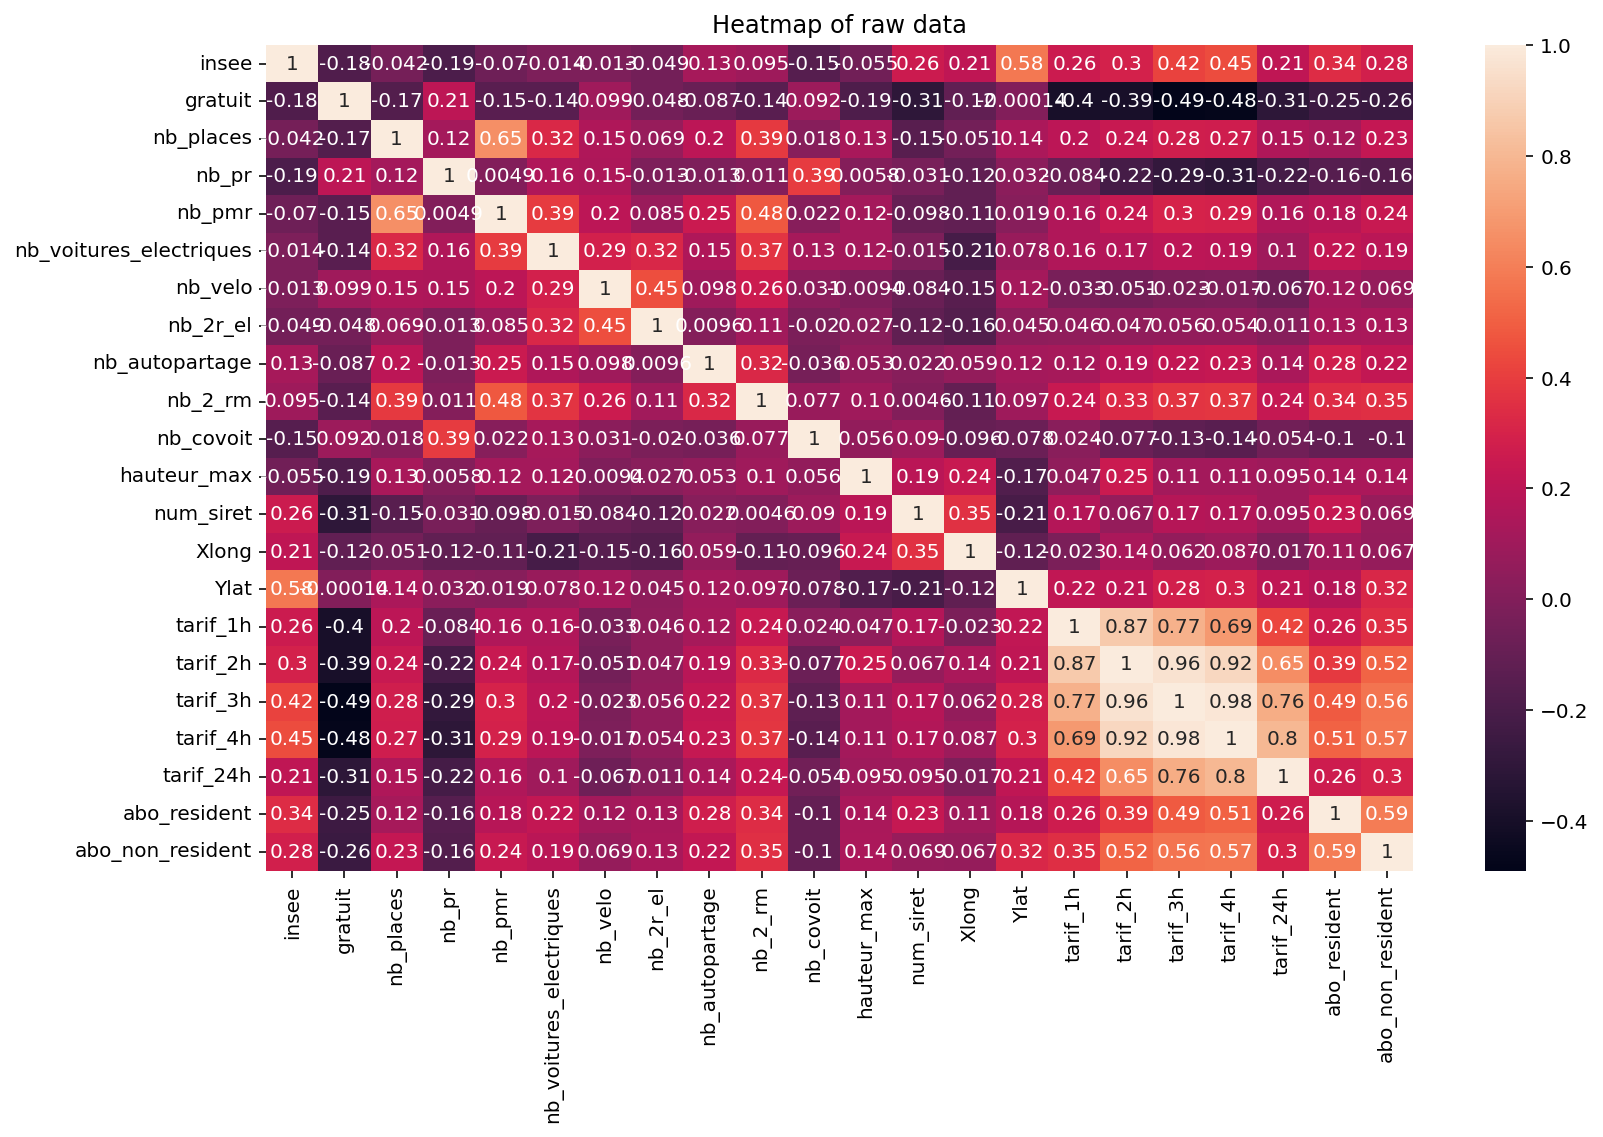

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of raw data')
plt.tight_layout()

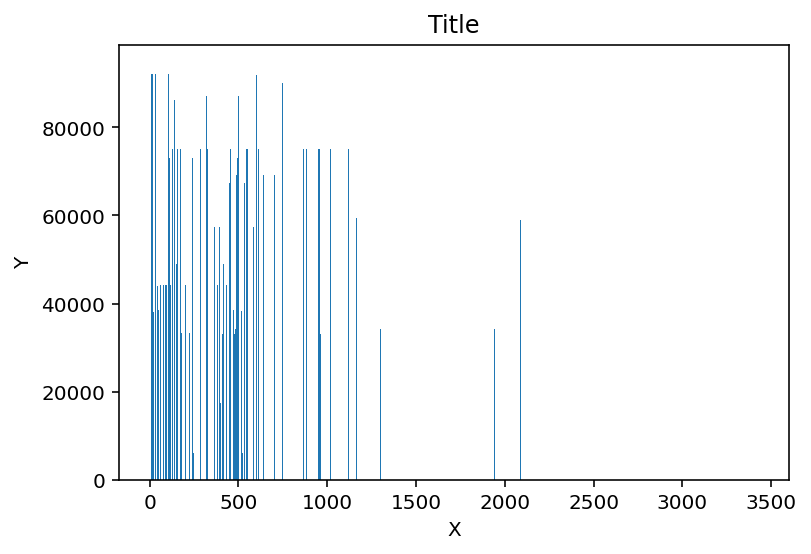

In [8]:
plt.bar(df['nb_places'], df['insee'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()